In [1]:
from source_code import evaluation
import numpy as np
from source_code.evaluation import *
from source_code.comparison import *

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
np.random.seed(42)

Loading the PIE dataset...
(20, 64, 64)
20
Training RobustPCA model for unmasking...


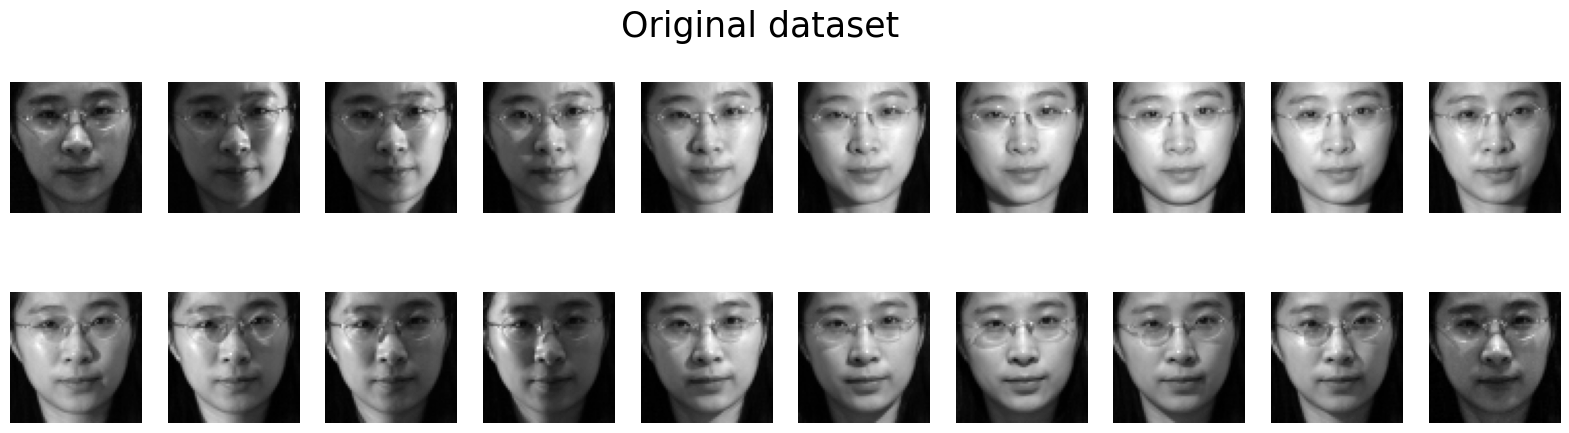

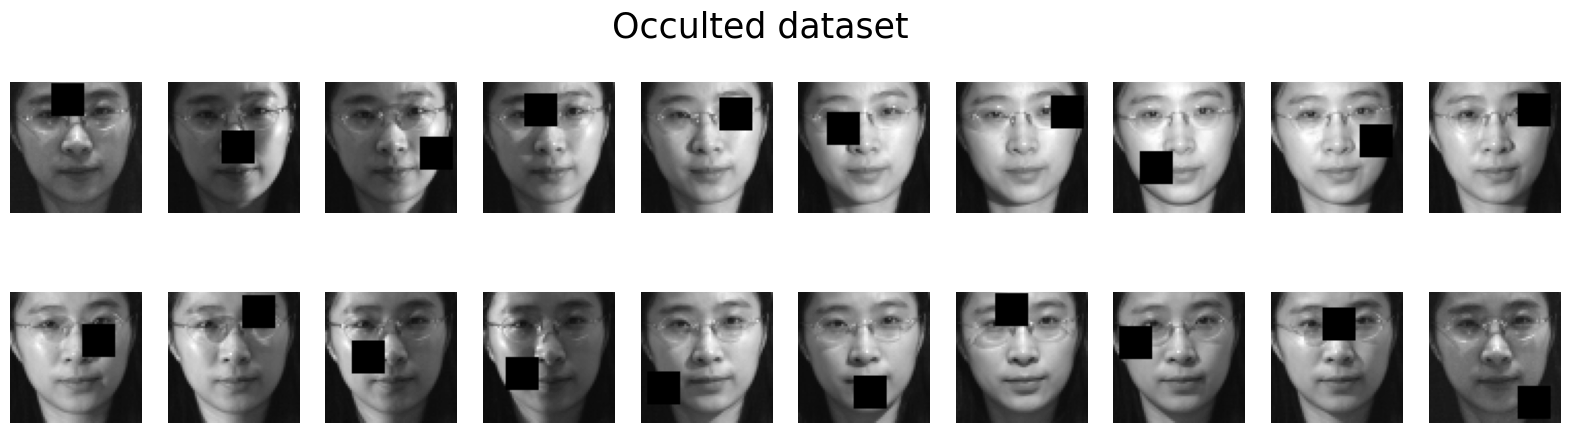

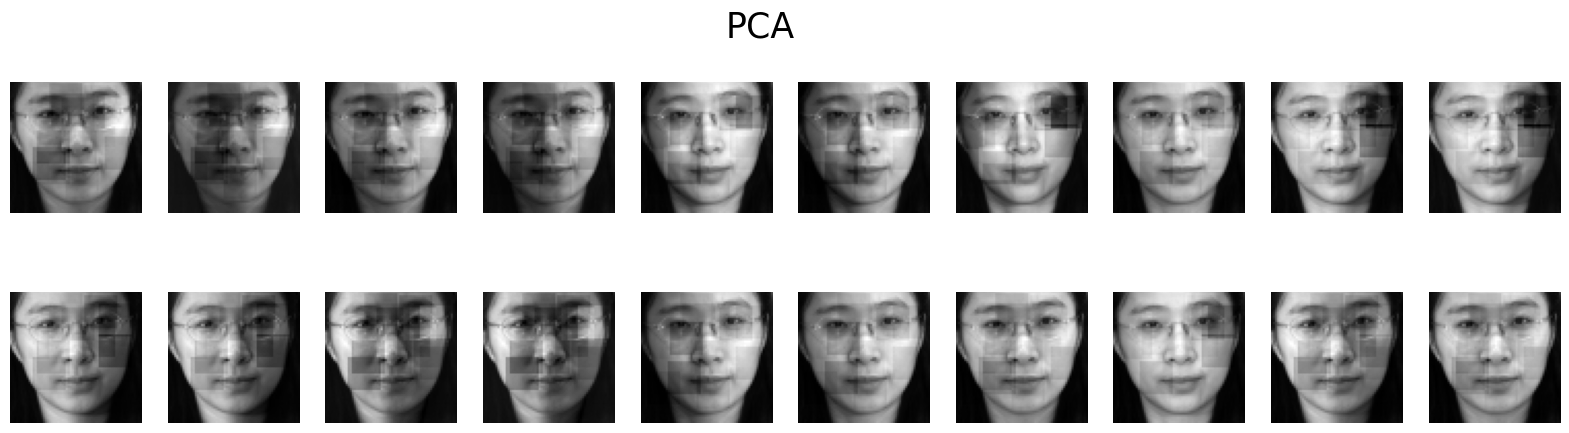

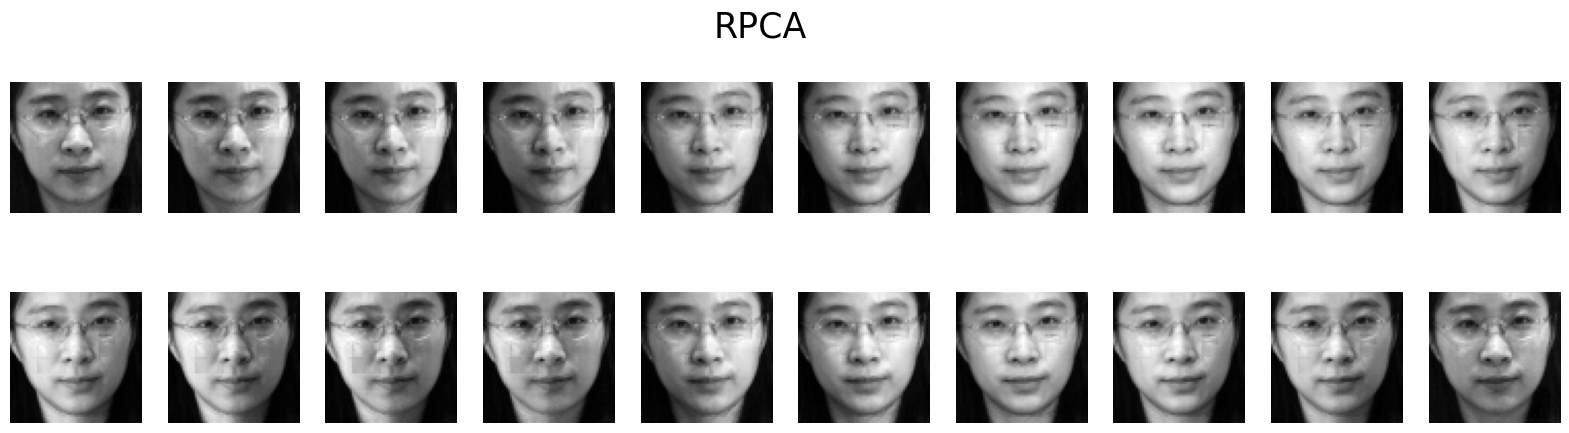

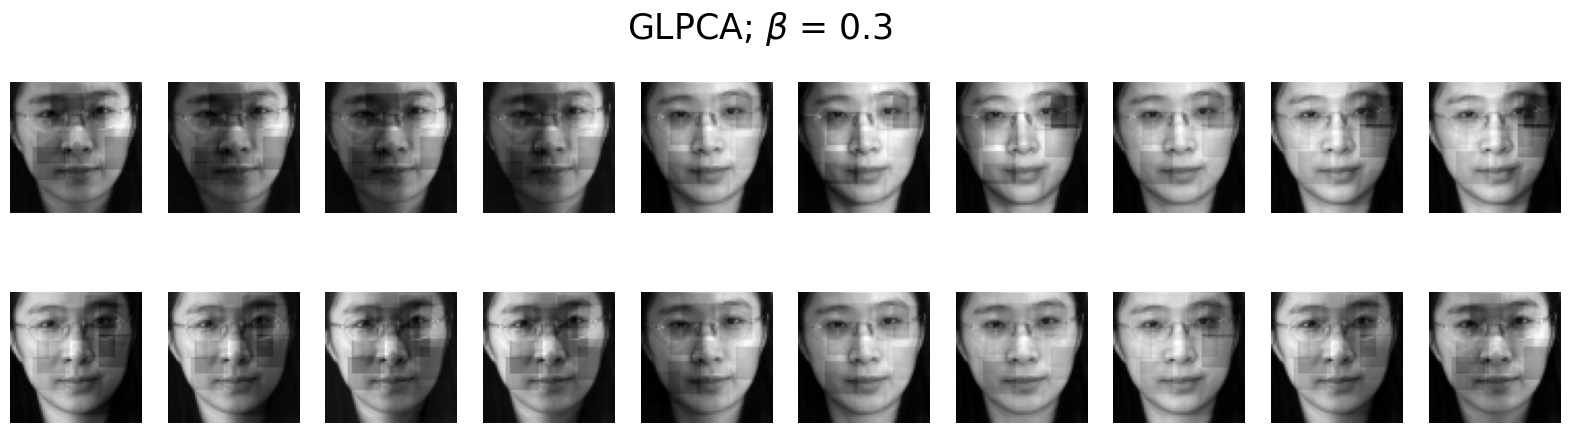

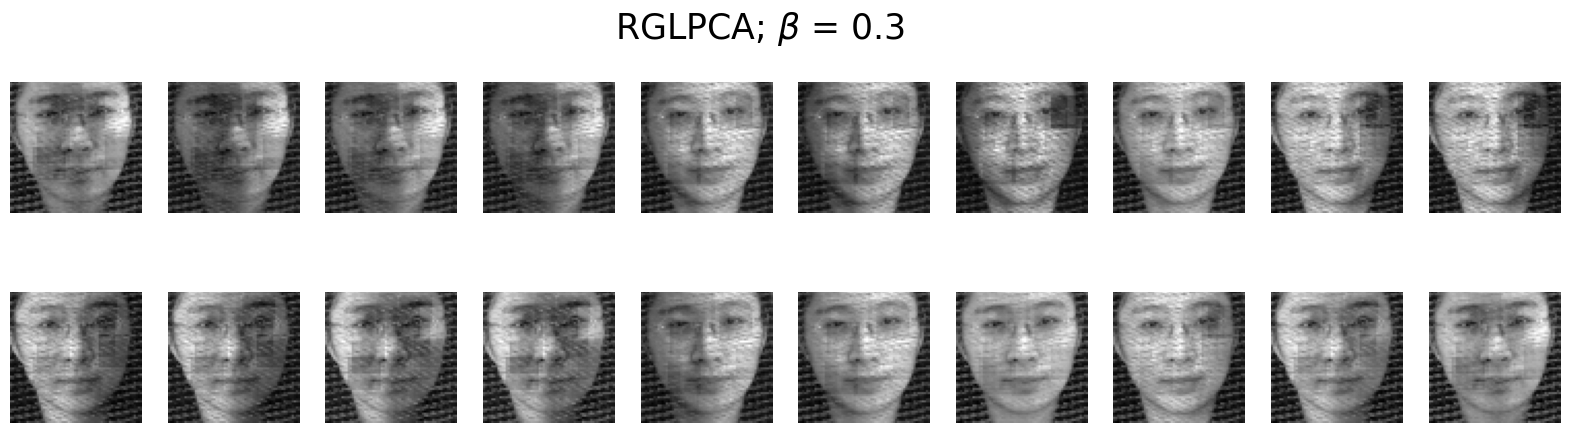

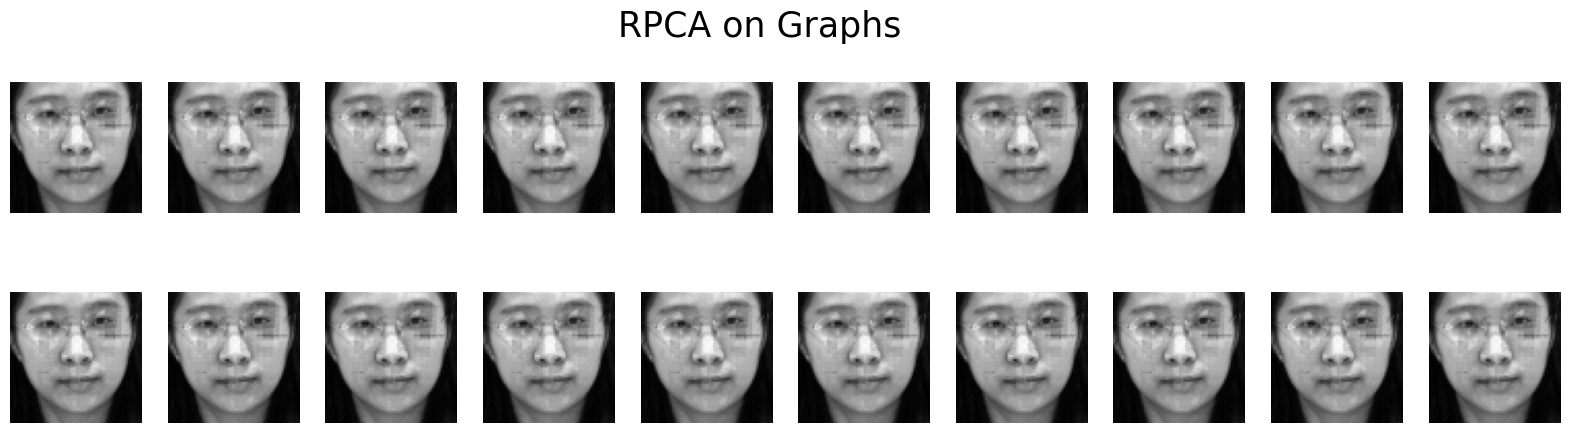

In [4]:
compare_methods("pie", 20, 0.3)

# Clustering test

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [6]:
dataset = "att"
n_data_by_class = 10
X_data = load_dataset(dataset, n_data_by_class, "all")

Loading the AT&T dataset...


In [7]:
Q_by_beta = dict()
for idx in range(40):
    X_data_class = X_data[idx*n_data_by_class:(idx+1)*n_data_by_class]
    X_occulted, G = occult_and_generate_graph(X_data_class, dataset, 25, n_data_by_class, n_data_by_class, "random")
    for beta in [0, 0.3]:
        GlPCA_model = GLPCA(beta = beta, k = 3)
        Q, U = GlPCA_model.fit(X_occulted, G)
        if Q_by_beta.get(beta) is None:
            Q_by_beta[beta] = Q
        else:
            Q_by_beta[beta] = np.concatenate((Q_by_beta[beta], Q), axis=0)

In [8]:
RGLPCA_Q_by_beta = dict()
for idx in range(40):
    X_data_class = X_data[idx*n_data_by_class:(idx+1)*n_data_by_class]
    X_occulted, G = occult_and_generate_graph(X_data_class, dataset, 25, n_data_by_class, n_data_by_class, "random")
    RGlPCA_model = RGLPCA(beta = 0.3, k = 3)
    Q, U = GlPCA_model.fit(X_occulted, G)
    if RGLPCA_Q_by_beta.get(beta) is None:
        RGLPCA_Q_by_beta[beta] = Q
    else:
        RGLPCA_Q_by_beta[beta] = np.concatenate((RGLPCA_Q_by_beta[beta], Q), axis=0)

In [9]:
Q_RPCA = None
for idx in range(40):
    X_data_class = X_data[idx*n_data_by_class:(idx+1)*n_data_by_class]
    X_occulted, _ = occult_and_generate_graph(X_data_class, dataset, 25, n_data_by_class, n_data_by_class, "random")
    L_RPCA, S_RPCA = evaluate_RPCA(X_occulted, n_data_by_class = n_data_by_class, plot = False)
    U, S, Q = np.linalg.svd(L_RPCA, full_matrices=False)
    if Q_RPCA is None:
        Q_RPCA = Q
    else:
        Q_RPCA = np.concatenate((Q_RPCA, Q), axis=0)

Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmas

In [10]:
labels_true = np.arange(40).repeat(10)

In [11]:
def clustering_error(y_true, y_pred):
    return 100*(1 - accuracy_score(y_true, y_pred))

In [12]:
ARI_list = []
NMI_list = []
error_list = []
for i in range(10):
    kmeans = KMeans(n_clusters=40, random_state=i).fit(X_data.reshape(400, 112*92))
    labels_pred = kmeans.labels_
    ARI_list.append(adjusted_rand_score(labels_true, labels_pred))
    NMI_list.append(normalized_mutual_info_score(labels_true, labels_pred))
    error_list.append(clustering_error(labels_true, labels_pred))

print("Clustering with original data")
print("Max ARI = ", np.max(ARI_list))
print("Max NMI = ", np.max(NMI_list))
print("Min error = ", np.min(error_list))

mean_ari = np.mean(ARI_list)
std_ari = np.std(ARI_list)
mean_nmi = np.mean(NMI_list)
std_nmi = np.std(NMI_list)
mean_error = np.mean(error_list)
std_error = np.std(error_list)

print(f"Mean ARI = {mean_ari:.4f} +- {std_ari:.4f}")
print(f"Mean NMI = {mean_nmi:.4f} +- {std_nmi:.4f}")
print(f"Mean error = {mean_error:.4f} +- {std_error:.4f}")

Clustering with original data
Max ARI =  0.6375865051903115
Max NMI =  0.867146070037581
Min error =  95.25
Mean ARI = 0.5988 +- 0.0318
Mean NMI = 0.8551 +- 0.0110
Mean error = 97.5250 +- 1.1037


In [13]:
ARI_list = []
NMI_list = []
error_list = []
for i in range(10):
    kmeans = KMeans(n_clusters=40, random_state=i).fit(Q_by_beta[0])
    labels_pred = kmeans.labels_
    ARI_list.append(adjusted_rand_score(labels_true, labels_pred))
    NMI_list.append(normalized_mutual_info_score(labels_true, labels_pred))
    error_list.append(clustering_error(labels_true, labels_pred))
print("Method : PCA")
print("ARI = ", np.max(ARI_list))
print("NMI = ", np.max(NMI_list))
print("Min error = ", np.min(error_list))

mean_ari = np.mean(ARI_list)
std_ari = np.std(ARI_list)
mean_nmi = np.mean(NMI_list)
std_nmi = np.std(NMI_list)
mean_error = np.mean(error_list)
std_error = np.std(error_list)

print(f"Mean ARI = {mean_ari:.4f} +- {std_ari:.4f}")
print(f"Mean NMI = {mean_nmi:.4f} +- {std_nmi:.4f}")
print(f"Mean error = {mean_error:.4f} +- {std_error:.4f}")

Method : PCA
ARI =  0.02453859733590114
NMI =  0.4395696502112792
Min error =  95.75
Mean ARI = 0.0205 +- 0.0020
Mean NMI = 0.4329 +- 0.0043
Mean error = 97.6250 +- 0.9371


In [14]:
ARI_list = []
NMI_list = []
error_list = []

for i in range(10):
    kmeans = KMeans(n_clusters=40, random_state=i).fit(Q_by_beta[beta])
    labels_pred = kmeans.labels_
    ARI_list.append(adjusted_rand_score(labels_true, labels_pred))
    NMI_list.append(normalized_mutual_info_score(labels_true, labels_pred))
    error_list.append(clustering_error(labels_true, labels_pred))
print("Method : GLPCA, beta = " + str(beta))
print("ARI = ", np.max(ARI_list))
print("NMI = ", np.max(NMI_list))
print("Min error = ", np.min(error_list))

mean_ari = np.mean(ARI_list)
std_ari = np.std(ARI_list)
mean_nmi = np.mean(NMI_list)
std_nmi = np.std(NMI_list)
mean_error = np.mean(error_list)
std_error = np.std(error_list)

print(f"Mean ARI = {mean_ari:.4f} +- {std_ari:.4f}")
print(f"Mean NMI = {mean_nmi:.4f} +- {std_nmi:.4f}")
print(f"Mean error = {mean_error:.4f} +- {std_error:.4f}")

Method : GLPCA, beta = 0.3
ARI =  0.04634948302499703
NMI =  0.4689794138692327
Min error =  96.0
Mean ARI = 0.0434 +- 0.0018
Mean NMI = 0.4668 +- 0.0014
Mean error = 97.7750 +- 0.9903


In [15]:
ARI_list = []
NMI_list = []
error_list = []

for i in range(10):
    kmeans = KMeans(n_clusters=40, random_state=i).fit(RGLPCA_Q_by_beta[beta])
    labels_pred = kmeans.labels_
    ARI_list.append(adjusted_rand_score(labels_true, labels_pred))
    NMI_list.append(normalized_mutual_info_score(labels_true, labels_pred))
    error_list.append(clustering_error(labels_true, labels_pred))
print("Method : RGLPCA, beta = " + str(beta))
print("ARI = ", np.max(ARI_list))
print("NMI = ", np.max(NMI_list))
print("Min error = ", np.min(error_list))

mean_ari = np.mean(ARI_list)
std_ari = np.std(ARI_list)
mean_nmi = np.mean(NMI_list)
std_nmi = np.std(NMI_list)
mean_error = np.mean(error_list)
std_error = np.std(error_list)

print(f"Mean ARI = {mean_ari:.4f} +- {std_ari:.4f}")
print(f"Mean NMI = {mean_nmi:.4f} +- {std_nmi:.4f}")
print(f"Mean error = {mean_error:.4f} +- {std_error:.4f}")

Method : RGLPCA, beta = 0.3
ARI =  0.058897687814805595
NMI =  0.4906446048086922
Min error =  95.5
Mean ARI = 0.0525 +- 0.0036
Mean NMI = 0.4818 +- 0.0045
Mean error = 97.9500 +- 0.9670


In [16]:
ARI_list = []
NMI_list = []
error_list = []

for i in range(10):
    kmeans = KMeans(n_clusters=40, random_state=i).fit(Q_RPCA)
    labels_pred = kmeans.labels_
    ARI_list.append(adjusted_rand_score(labels_true, labels_pred))
    NMI_list.append(normalized_mutual_info_score(labels_true, labels_pred))
    error_list.append(clustering_error(labels_true, labels_pred))
print("Method : RPCA")
print("ARI = ", np.max(ARI_list))
print("NMI = ", np.max(NMI_list))
print("Min error = ", np.min(error_list))

mean_ari = np.mean(ARI_list)
std_ari = np.std(ARI_list)
mean_nmi = np.mean(NMI_list)
std_nmi = np.std(NMI_list)
mean_error = np.mean(error_list)
std_error = np.std(error_list)

print(f"Mean ARI = {mean_ari:.4f} +- {std_ari:.4f}")
print(f"Mean NMI = {mean_nmi:.4f} +- {std_nmi:.4f}")
print(f"Mean error = {mean_error:.4f} +- {std_error:.4f}")

Method : RPCA, beta = 0.3
ARI =  -0.019489044154067336
NMI =  0.3254506821603868
Min error =  95.5
Mean ARI = -0.0203 +- 0.0007
Mean NMI = 0.3156 +- 0.0064
Mean error = 97.3250 +- 1.0431
